## Lotka-Volterra 1 predator 1 prey test

### Roe Deer and Wolf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import *
from random import randint
import scipy
from scipy import signal

# Roe deer and wolf
alpha1 = 9/11 # Birth rate roe deer
beta1 = 0.631*4.86/365.25 # Death rate roe deer
gamma1 =  25/26 # Death rate wolf
delta1 = 0.00356 *0.7*0.5 # Grow rate wolf based on roe deer
epsilon1 = 0.00356 *0.3*0.5 # Grow rate predator based on wild board
eta1 = 4.56 # 6.22 Brith rate wild boar
zeta1 = 5.8*0.6*4.86/365.25# 12.4/365.25 # Death rate wild boar

# Time * step = amount of years
time = 36525 # Approx. amount of days in 100 years
step1 = 1/365.25 # 1 day

# Initial populations
init_pred = 10
init_prey1 = 2500
init_prey12 = 500

# Differential equation predator population
def pred_eq(gamma, delta, epsilon, w, r, z, step):
    return step * w * (-gamma + delta*r + epsilon*z) 

# Differential equation prey1 population
def prey1_eq(alpha, beta, w, r, step):
    return step * r * (alpha - beta*w)

# Differential equation prey2 population
def prey2_eq(eta, zeta, w, z, step):
    return step * z * (eta - zeta*w)

In [2]:
def plot_figure(t, pred, prey1, prey12, title, plot_prey):
    plt.figure(figsize=(6,4))
    plt.plot(t, pred)
    legend_list = ['Wolf']
    
    if plot_prey:
        plt.plot(t, prey1)
        plt.plot(t, prey12)
        legend_list = ['Wolf', 'Roe deer', 'Wild boar']
    
    plt.ylabel('Number of animals')
    plt.xlabel('Time (years)')
    plt.title(title, fontsize=20)
    plt.legend(legend_list, loc='upper left')
    plt.show()

In [3]:
def setup_sliders(init_pred, init_prey1, init_prey12, alpha1, beta1, gamma1, delta1, epsilon1, eta1, zeta1, step1):
    ipred_slider = widgets.IntSlider(value=init_pred, min=0, max=100, step=1)
    iprey1_slider = widgets.IntSlider(value=init_prey1, min=0, max=5000, step=1)
    iprey12_slider = widgets.IntSlider(value=init_prey12, min=0, max=300, step=1)
    a1_slider = widgets.FloatSlider(value=alpha1, min=0, max=3, step=0.1)
    b1_slider = widgets.FloatSlider(value=beta1, min=0, max=3, step=0.1)
    g1_slider = widgets.FloatSlider(value=gamma1, min=0, max=3, step=0.1)
    d1_slider = widgets.FloatSlider(value=delta1, min=0, max=0.2, step=0.01)
    e1_slider = widgets.FloatSlider(value=epsilon1, min=0, max=0.2, step=0.01)
    et1_slider = widgets.FloatSlider(value=eta1, min=0, max=7, step=0.1)
    z1_slider = widgets.FloatSlider(value=zeta1, min=0, max=3, step=0.01)
    s1_slider = widgets.FloatSlider(value=step1, min=0, max=0.005, step=0.0001)
    period_slider = widgets.IntSlider(value=365, min=0, max=1095, step=1)
    pop_coef_slider = widgets.FloatSlider(value=0.9, min=0, max=1, step=0.01)
    scale_slider = widgets.IntSlider(value=1, min=1, max=100, step=1)
    plot_prey_checkbox = widgets.Checkbox(value=True, disabled=False)
    
    return [ipred_slider, iprey1_slider, iprey12_slider, 
            a1_slider, b1_slider, g1_slider, d1_slider, 
            e1_slider, et1_slider, z1_slider, s1_slider, 
            period_slider, pop_coef_slider, scale_slider, plot_prey_checkbox]

In [35]:
def verification(init_pred, init_prey1, init_prey12, step1, per, pop_coef1, 
            shoot_deer, shoot_boar, shoot_wolf, introduce_wolf, title, scale, plot_prey, severe_winter, introduce):
    
    update(init_pred, init_prey1, init_prey12, step1, per, pop_coef1, 
            shoot_deer, shoot_boar, shoot_wolf, introduce_wolf, title, scale, plot_prey, severe_winter, introduce)

In [49]:
def lotka_volterra(params, alpha1=alpha1, beta1=beta1, gamma1=gamma1, 
                   delta1=delta1, epsilon1=epsilon1, eta1=eta1, zeta1=zeta1):
    
    # unpack paramters from params
    init_pred, init_prey1, init_prey12, step1, period, pop_coeff, shoot_deer, shoot_boar, shoot_wolf, introduce_wolf, severe_winter, introduce = params
    
    # Initialize arrays for number of animals in populations
    pred = [init_pred]
    prey1 = [init_prey1]
    prey12 = [init_prey12]

    num_pred = init_pred
    num_prey1 = init_prey1
    num_prey12 = init_prey12

    # Update the number of animals time times and store them in arrays
    for n in range(time):
        dpred = pred_eq(gamma1, delta1, epsilon1, num_pred, num_prey1, num_prey12, step1)
        dprey1 = prey1_eq(alpha1, beta1, num_pred, num_prey1, step1)
        dprey12 = prey2_eq(eta1, zeta1, num_pred, num_prey12, step1)
        num_pred += dpred
        num_prey1 += dprey1
        num_prey12 += dprey12
        
        # Following a couple of real life events that can occur. To simulate an event
        # uncomment the event and run this cell again.
        
        # Regulation event 1. Every year prey regulation. 
        
        if n == 1550 and introduce:
            num_prey1 = 100
#             num_prey12 = 100
        
        # Shoot percentage of the deer every period.
        if shoot_deer == "percentage" and (n % period == 0):
            num_prey1 *= pop_coeff
        
        # Shoot a set amount of the deer every period.
        elif shoot_deer == "static" and (n % period == 0):
            if (num_prey1 > pop_coeff):
                num_prey1 -= pop_coeff
            else:
                num_prey1 = 0
                
        # Shoot a percentage of the growth every period.
        elif shoot_deer == "dynamic" and (n % period == 0):
            num_prey1 -= dprey1 * pop_coeff
            
         # Shoot percentage of the boar every period.
        if shoot_boar == "percentage" and (n % period == 0):
            num_prey12 *= pop_coeff
        
        # Shoot a set amount of the boar every period.
        elif shoot_boar == "static" and (n % period == 0):
            if (num_prey12 > pop_coeff):
                num_prey12 -= pop_coeff
            else:
                num_prey12 = 0
                
        # Shoot a percentage of the growth every period.
        elif shoot_boar == "dynamic" and (n % period == 0):
            num_prey12 -= dprey12 * pop_coeff
            
         # Shoot percentage of the wolf every period.
        if shoot_wolf == "percentage" and (n % period == 0):
            num_pred *= pop_coeff
        
        # Shoot a set amount of the wolf every period.
        elif shoot_wolf == "static" and (n % period == 0):
            if (num_pred > pop_coeff):
                num_pred -= pop_coeff
            else:
                num_pred = 0
                
        # Shoot a percentage of the growth every period.
        elif shoot_wolf == "dynamic" and (n % period == 0):
            num_pred -= dpred * pop_coeff
        
        # gradual (monthly) introduction/increase of wolves.
        # Start with 1 wolf and comment 
        if introduce_wolf and (n % period == 0):
            num_pred += pop_coeff * 10
        
        # reduce growth during 90 days
        if severe_winter and (n % period < 90):
            num_prey1 -= dprey1 * pop_coeff
            num_prey12 -= dprey12 * pop_coeff
        
        pred.append(num_pred)
        prey1.append(num_prey1)
        prey12.append(num_prey12)
    
    return [pred, prey1, prey12]


def update(init_pred, init_prey1, init_prey12, step1, period1, pop_coef1, 
            shoot_deer, shoot_boar, shoot_wolf, introduce_wolf, title, scale, plot_prey, severe_winter, introduce):

    params = [init_pred, init_prey1, init_prey12, step1, period1, 
              pop_coef1, shoot_deer, shoot_boar, shoot_wolf, introduce_wolf, severe_winter, introduce]
    
    results = lotka_volterra(params)
    
    pred, prey1, prey12 = results
    
    # Plot the figure
    t = range(int((time + 1) / scale))
    t = [step1* x /
         scale for x in t]
    
    # Correct dimensions of the list to prevent dimension
    # errors during plotting.
    last = int((len(pred) - 1) / scale)
    if last > len(t):
        last -= 1
    elif last < len(t):
        last += 1
        
    plot_figure(t, pred[0:last], prey1[0:last], prey12[0:last], title, plot_prey)
    

slider = setup_sliders(init_pred, init_prey1, init_prey12, 
                       alpha1, beta1, gamma1, delta1, epsilon1, 
                       eta1, zeta1, step1)

interact_manual(update, init_pred=slider[0], init_prey1=slider[1], init_prey12=slider[2], step1=slider[10], 
                period1 = slider[11], pop_coef1 = 0.9, 
                shoot_deer = ["none", "percentage", "static", "dynamic"], 
                shoot_boar = ["none", "percentage", "static", "dynamic"],
                shoot_wolf = ["none", "percentage", "static", "dynamic"],
                introduce_wolf = False, title="Wolf-Roe deer-Wild boar model",
                scale = slider[13], plot_prey = slider[14], severe_winter=False, introduce = False);

interactive(children=(IntSlider(value=10, description='init_pred'), IntSlider(value=2500, description='init_pr…

In [38]:
def get_periodicity(data, height=150, index=0):
    ''' returns the amount of peaks (periods) in data '''
    return len(scipy.signal.find_peaks(data, height=height)[index])

def periodicity(index, x_range, params):
    results = []
    
    for i in x_range:
        params[5] = i
        num_periods = get_periodicity((lotka_volterra(params)[index]))
        results.append(num_periods)
    
    return results

# def plot_stats(results, start, end, steps):
#     x_range = list(np.arange(start, end+steps, steps))
#     print(results, "\n", x_range)
#     plt.plot(x_range, results)
#     plt.show()
#     return

The amount of periods without any events is  10  periods.


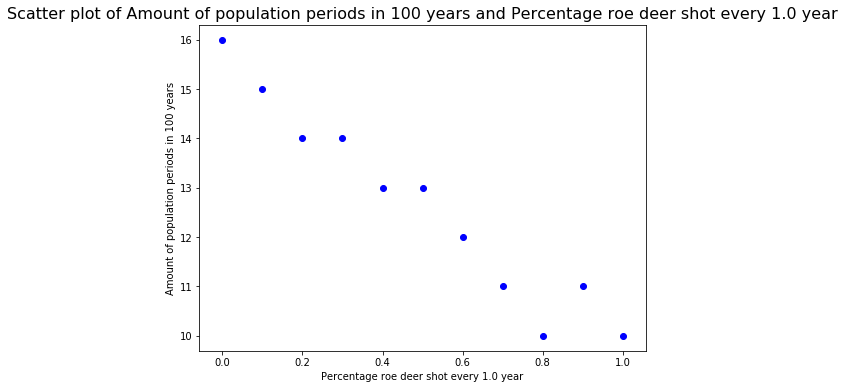

Significant correlation? True


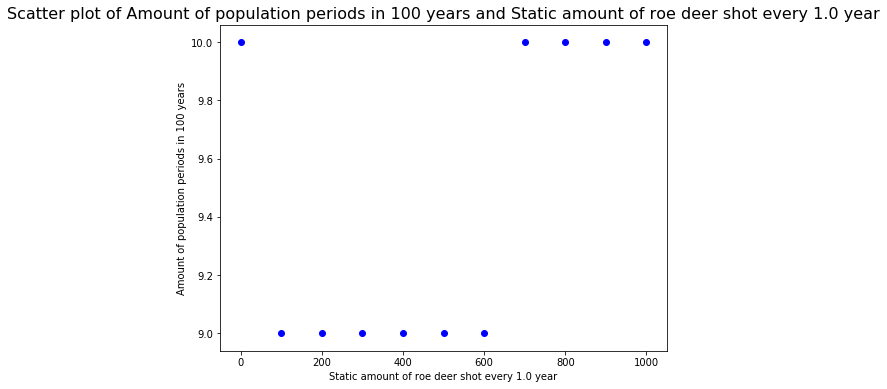

Significant correlation? True


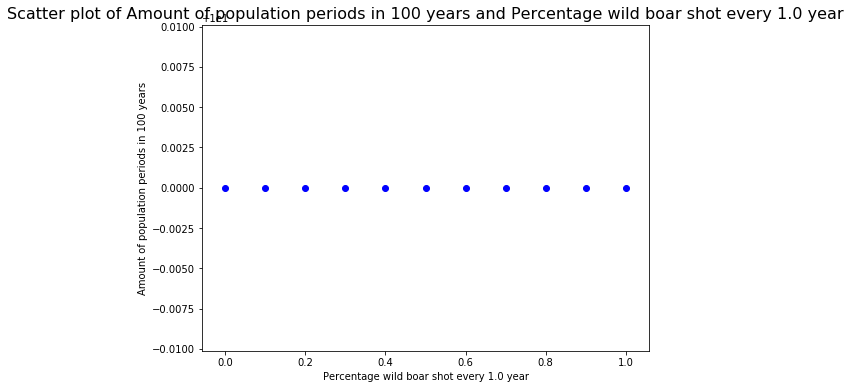

Significant correlation? False


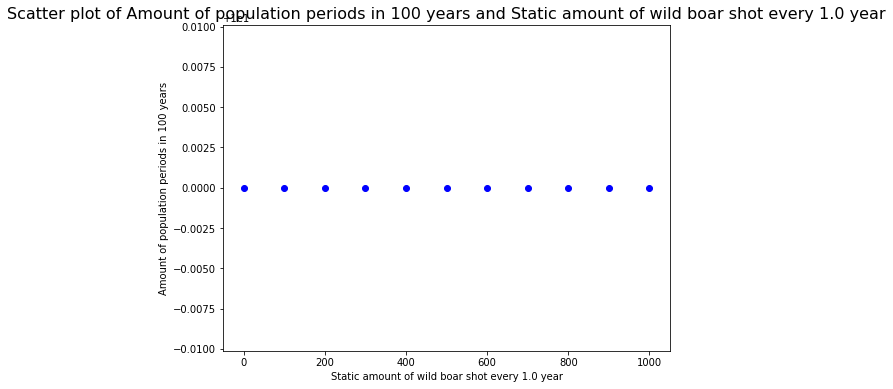

Significant correlation? False


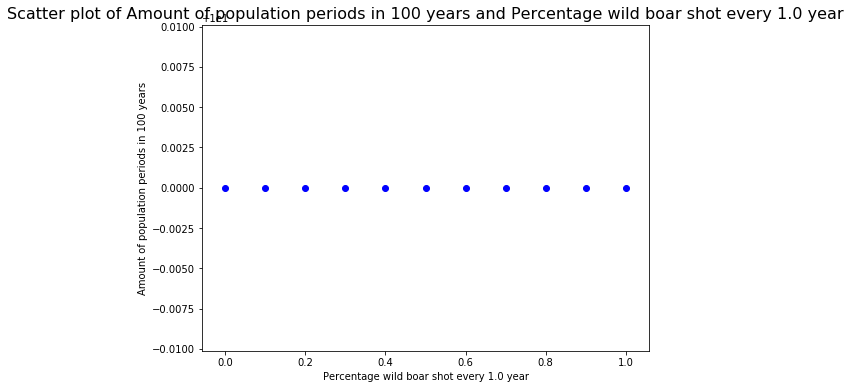

Significant correlation? False


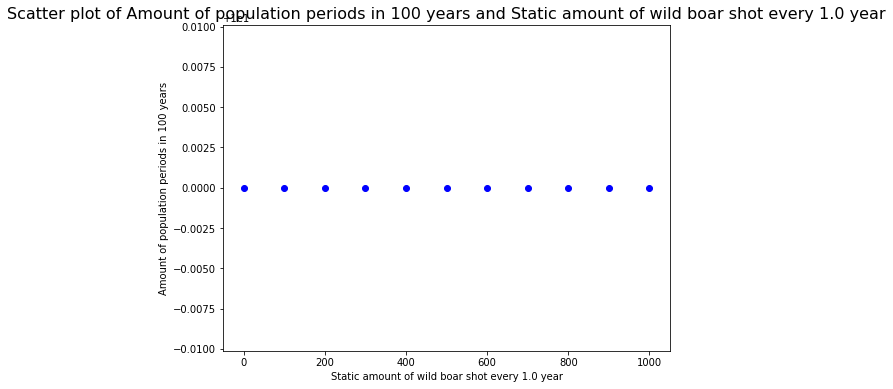

Significant correlation? False


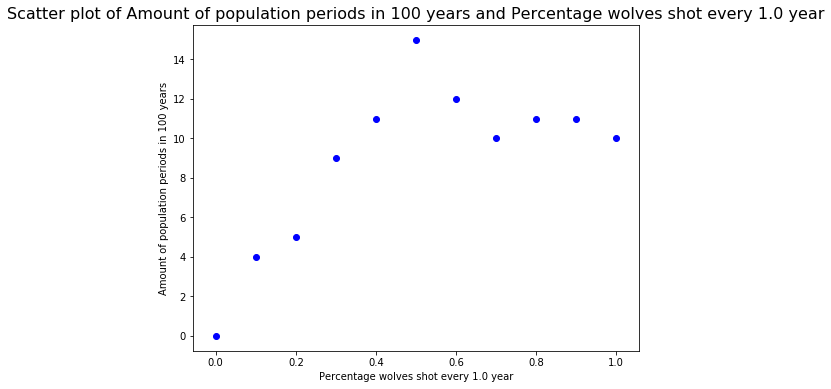

Significant correlation? False


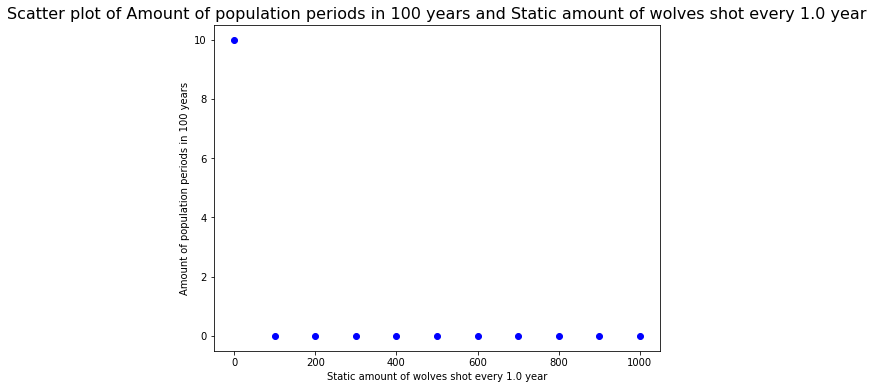

Significant correlation? True


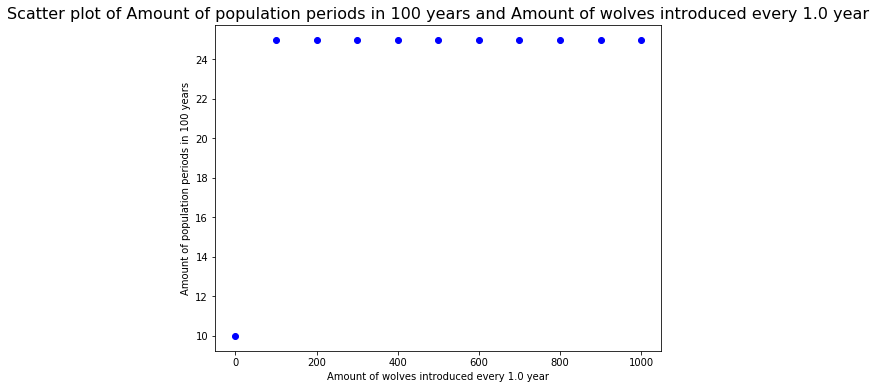

Significant correlation? True


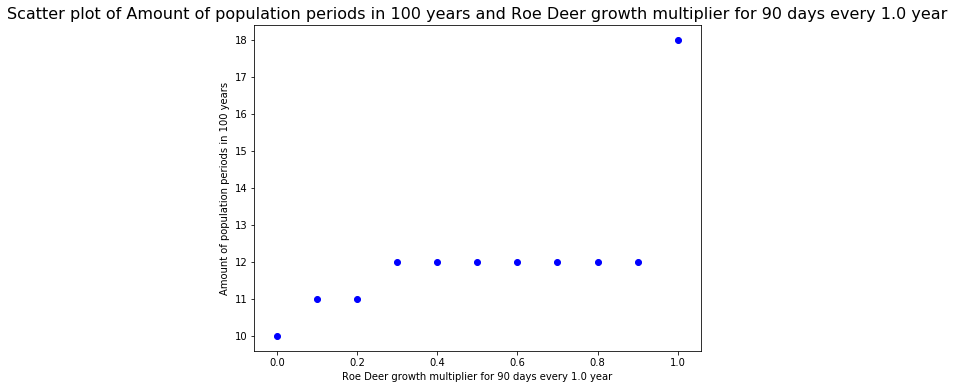

Significant correlation? True


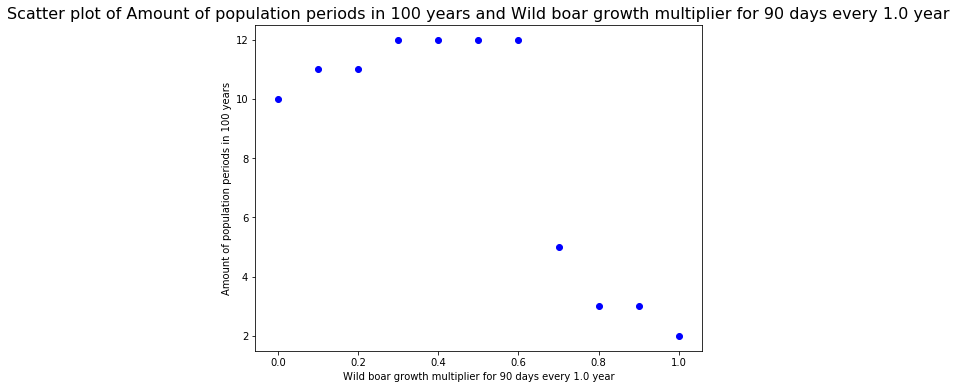

Significant correlation? False


In [40]:
params = [init_pred, init_prey1, init_prey12, step1, 365.25, 0.9, 'none', 'none', 'none', False, False, False]

# Results without any alterations
mean_r = periodicity(0, [0], params)
print('The amount of periods without any events is ', mean_r[0], " periods.")

# Deer shooting

# shoot percentage of deer
params[6] = 'percentage'
spod_results = periodicity(0, np.arange(0, 1.1, 0.1), params)
make_scatter_plot(np.arange(0, 1.1, 0.1), spod_results, 
                  'Percentage roe deer shot every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(spod_results, mean_r[0]))

# shoot set amount of deer
params[6] = 'static'
ssaod_results = periodicity(0, np.arange(0, 1100, 100), params)
params[6] = 'none'
make_scatter_plot(np.arange(0, 1100, 100), ssaod_results, 
                  'Static amount of roe deer shot every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(ssaod_results, mean_r[0]))

# Wild boar shooting

# shoot percentage of wild boar
params[7] = 'percentage'
spowb_results = periodicity(0, np.arange(0, 1.1, 0.1), params)
make_scatter_plot(np.arange(0, 1.1, 0.1), spowb_results, 
                  'Percentage wild boar shot every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(spowb_results, mean_r[0]))

# shoot set amount of wild boar
params[7] = 'static'
ssaowb_results = periodicity(0, np.arange(0, 1100, 100), params)
params[7] = 'none'
make_scatter_plot(np.arange(0, 1100, 100), ssaowb_results, 
                  'Static amount of wild boar shot every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(ssaowb_results, mean_r[0]))

# shoot percentage of wild boar
params[7] = 'percentage'
spowb_results = periodicity(0, np.arange(0, 1.1, 0.1), params)
make_scatter_plot(np.arange(0, 1.1, 0.1), spowb_results, 
                  'Percentage wild boar shot every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(spowb_results, mean_r[0]))

# shoot set amount of wild boar
params[7] = 'static'
ssaowb_results = periodicity(0, np.arange(0, 1100, 100), params)
params[7] = 'none'
make_scatter_plot(np.arange(0, 1100, 100), ssaowb_results, 
                  'Static amount of wild boar shot every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(ssaowb_results, mean_r[0]))


# Wolf shooting

# shoot percentage of wolves
params[8] = 'percentage'
spow_results = periodicity(0, np.arange(0, 1.1, 0.1), params)
make_scatter_plot(np.arange(0, 1.1, 0.1), spow_results, 
                  'Percentage wolves shot every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(spow_results, mean_r[0]))

# shoot set amount of wolves
params[8] = 'static'
ssaow_results = periodicity(0, np.arange(0, 1100, 100), params)
params[8] = 'none'
make_scatter_plot(np.arange(0, 1100, 100), ssaow_results, 
                  'Static amount of wolves shot every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(ssaow_results, mean_r[0]))


# introduce set amount of wolves
params[9] = 'True'
iw_results = periodicity(0, np.arange(0, 1100, 100), params)
params[9] = 'False'
make_scatter_plot(np.arange(0, 1100, 100), iw_results, 
                  'Amount of wolves introduced every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(iw_results, mean_r[0]))


# severe winters
params[10] = 'True'
swd_results = periodicity(1, np.arange(0, 1.1, 0.1), params)
swb_results = periodicity(2, np.arange(0, 1.1, 0.1), params)
params[10] = 'False'
make_scatter_plot(np.arange(0, 1.1, 0.1), swd_results, 
                  'Roe Deer growth multiplier for 90 days every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(swd_results, mean_r[0]))

make_scatter_plot(np.arange(0, 1.1, 0.1), swb_results, 
                  'Wild boar growth multiplier for 90 days every %s year' % str(params[4]/365.25), 
                  'Amount of population periods in 100 years')
print('Significant correlation? %s' % test_significance(swb_results, mean_r[0]))

# Model Verification

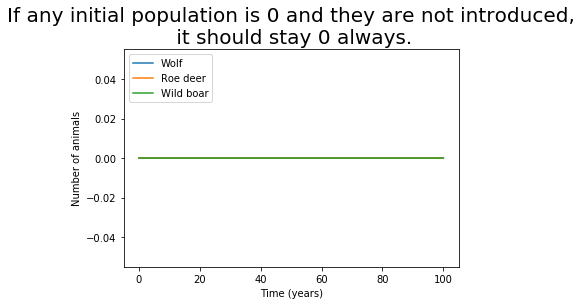

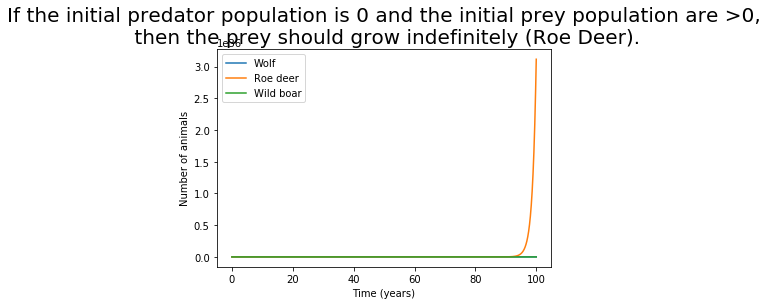

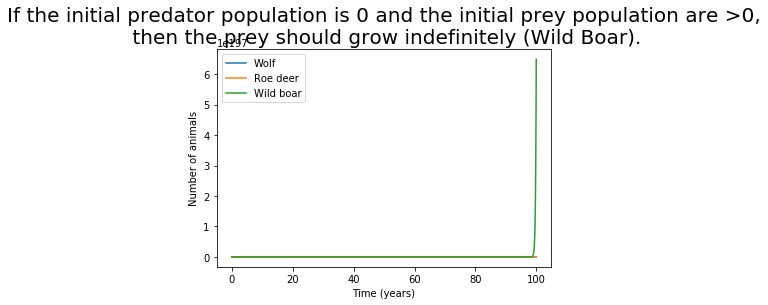

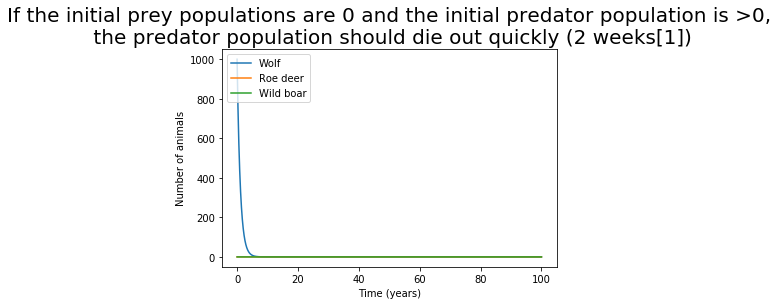

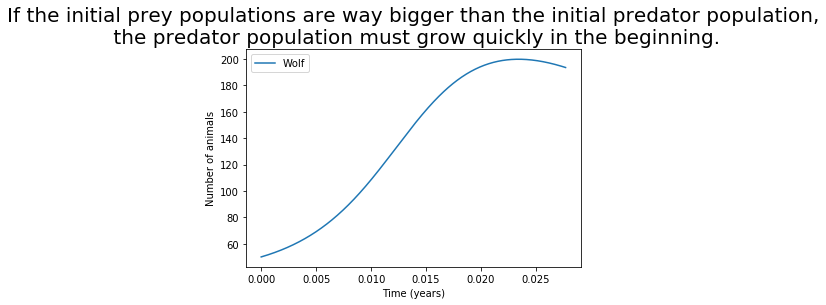

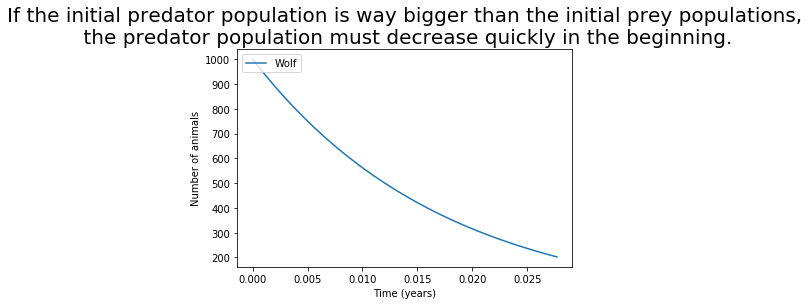

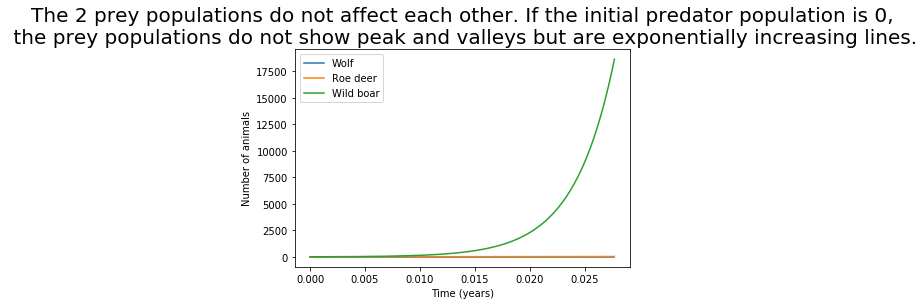

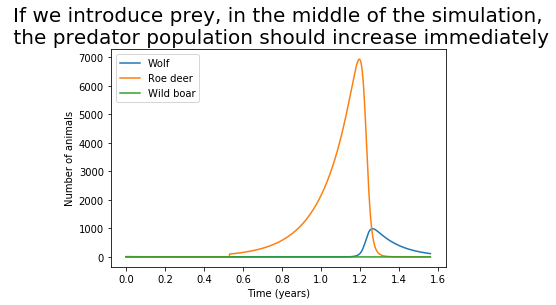

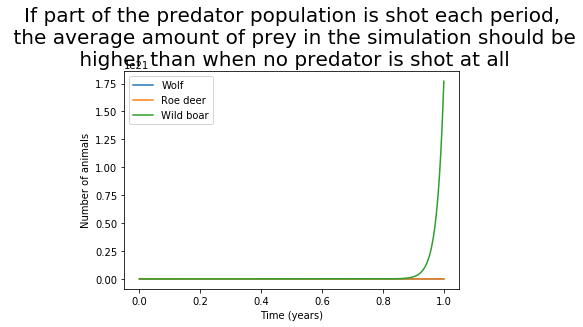

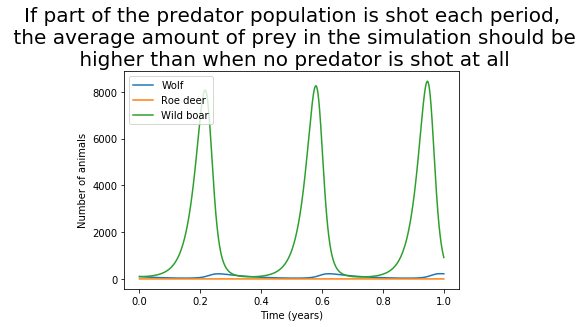

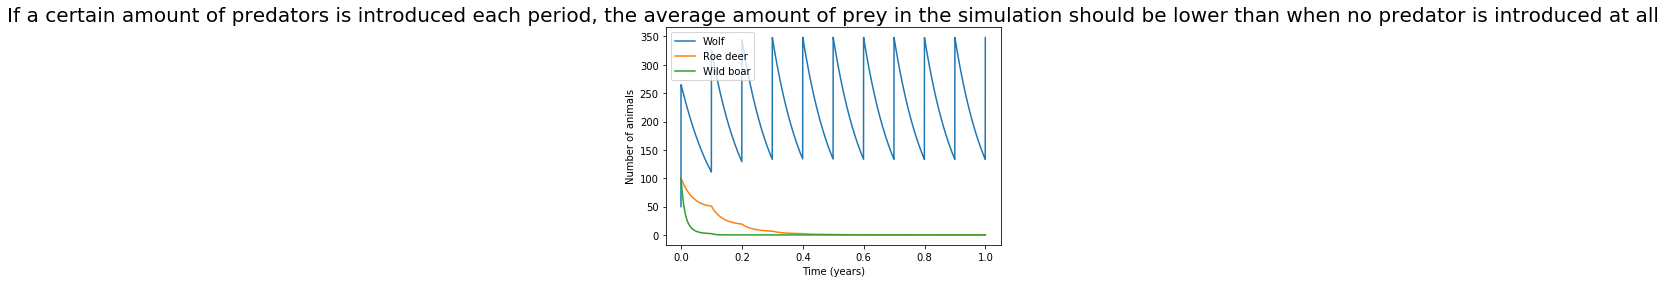

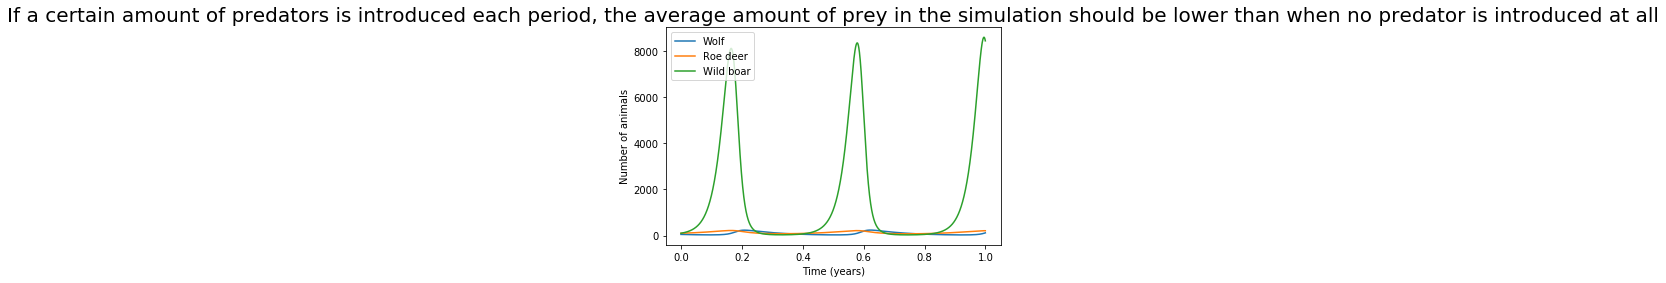

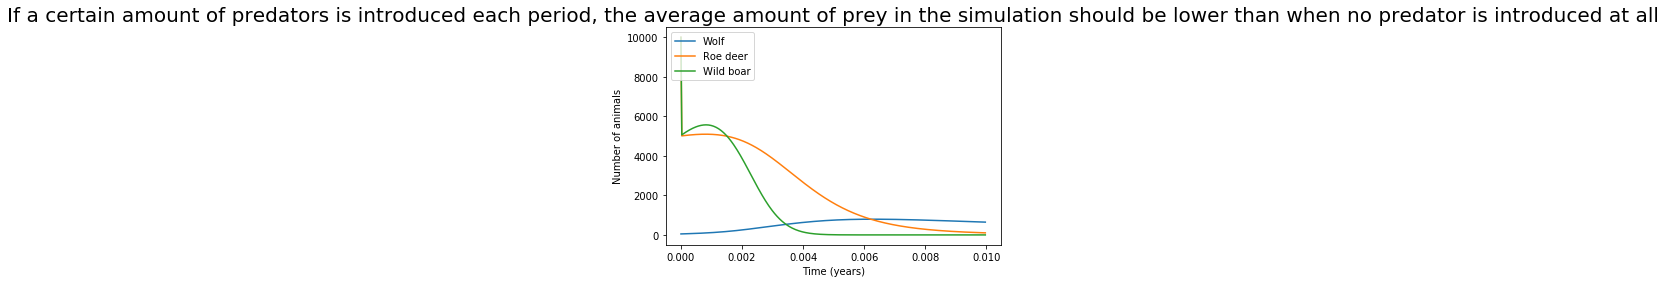

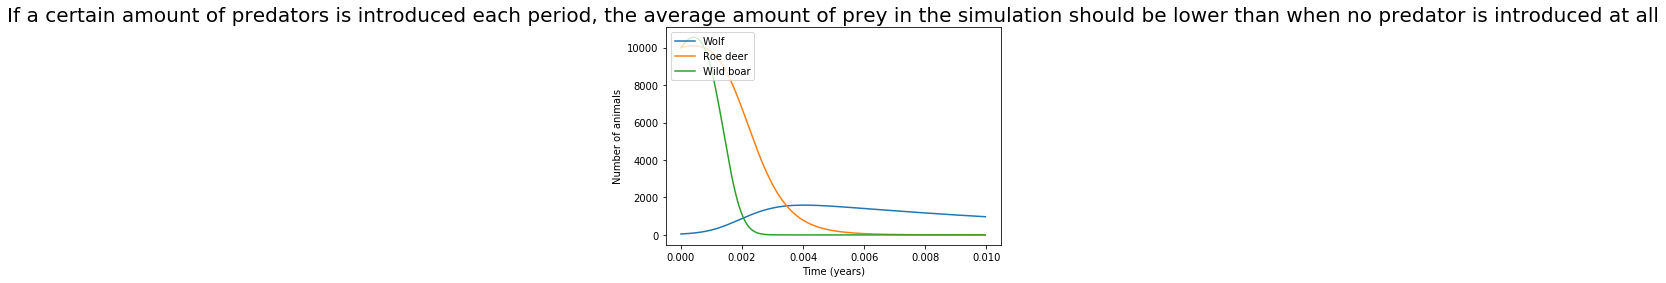

In [52]:
# If any initial population is 0 and they are not introduced, it should stay 0 always.
title = "If any initial population is 0 and they are not introduced,\n it should stay 0 always."
scale = 1
plot_prey = True
verification(0, 0, 0, step1, 365, 0.9, 
            False, False, False, False, title, scale, plot_prey, False, False)

# If the initial predator population is 0 and the initial prey population are >0, 
# then the prey should grow indefinitely.
title = "If the initial predator population is 0 and the initial prey population are >0,\n then the prey should grow indefinitely (Roe Deer)." 
verification(0, 10, 0, step1, 365, 0.9, 
            False, False, False, False, title, scale, plot_prey, False, False)

title = "If the initial predator population is 0 and the initial prey population are >0,\n then the prey should grow indefinitely (Wild Boar)." 
# If the initial predator population is 0 and the initial prey population are >0, 
# then the prey should grow indefinitely.
verification(0, 0, 10, step1, 365, 0.9, 
            False, False, False, False, title, scale, plot_prey, False, False)

title = "If the initial prey populations are 0 and the initial predator population is >0,\n the predator population should die out quickly (2 weeks[1])"
# If the initial prey populations are 0 and the initial predator population is >0, 
# the predator population should die out quickly (2 weeks[1])
verification(1000, 0, 0, step1, 365, 0.9, 
            False, False, False, False, title, scale, plot_prey, False, False)


# If the initial prey populations are way bigger than the initial predator population,
# the predator population must grow quickly in the beginning.
title = "If the initial prey populations are way bigger than the initial predator population,\n the predator population must grow quickly in the beginning."
scale = 60
plot_prey = False
verification(50, 1000, 1000,  step1, 365, 0.9, 
            False, False, False, False, title, scale, plot_prey, False, False)

# If the initial predator population is way bigger than the initial prey populations, 
# the predator population must decrease quickly in the beginning.
title = "If the initial predator population is way bigger than the initial prey populations,\n the predator population must decrease quickly in the beginning."
scale = 60
plot_prey = False
verification(1000, 10, 10, step1, 365, 0.9, 
            False, False, False, False, title, scale, plot_prey, False, False)

# The 2 prey populations do not affect each other. If the initial predator population is 0, 
# the prey populations do not show peak and valleys but are exponentially increasing lines.
title = "The 2 prey populations do not affect each other. If the initial predator population is 0,\n the prey populations do not show peak and valleys but are exponentially increasing lines."
scale = 60
plot_prey = True
verification(0, 10, 10, step1, 365, 0.9, 
            False, False, False, False, title, scale, plot_prey, False, False)

# If we introduce prey, in the middle of the simulation, the predator population should increase immediately
title = "If we introduce prey, in the middle of the simulation,\n the predator population should increase immediately"
scale = 8
plot_prey = True
verification(10, 0, 0, step1, 365, 0.9, 
            False, False, False, False, title, scale, plot_prey, False, True)

# If part of the predator population is shot each period,
# the average amount of prey in the simulation should be higher than when no predator is shot at all
title = "If part of the predator population is shot each period,\n the average amount of prey in the simulation should be\n higher than when no predator is shot at all"
scale = 10
plot_prey = True
verification(100, 0, 100, step1, 365, 70, 
            "none", "none", "static", False, title, scale, plot_prey, False, False)

# If part of the predator population is shot each period,
# the average amount of prey in the simulation should be
# higher than when no predator is shot at all
title = "If part of the predator population is shot each period,\n the average amount of prey in the simulation should be\n higher than when no predator is shot at all"
scale = 10
plot_prey = True
verification(100, 0, 100, step1, 365, 0, 
            "none", "none", "none", False, title, scale, plot_prey, False, False)
    
title = "If a certain amount of predators is introduced each period, the average amount of prey in the simulation should be lower than when no predator is introduced at all"
scale = 10
plot_prey = True
verification(50, 100, 100, step1, 365, 21.5, 
            "none", "none", "none", True, title, scale, plot_prey, False, False)

title = "If a certain amount of predators is introduced each period, the average amount of prey in the simulation should be lower than when no predator is introduced at all"
scale = 10
plot_prey = True
verification(50, 100, 100, step1, 365, 0, 
            "none", "none", "none", False, title, scale, plot_prey, False, False)

title = "If a certain amount of predators is introduced each period, the average amount of prey in the simulation should be lower than when no predator is introduced at all"
scale = 100
plot_prey = True
verification(50, 10000, 10000, step1, 365, 5000, 
            "static", "static", "none", False, title, scale, plot_prey, False, False)

title = "If a certain amount of predators is introduced each period, the average amount of prey in the simulation should be lower than when no predator is introduced at all"
scale = 100
plot_prey = True
verification(50, 10000, 10000, step1, 365, 0, 
            "static", "static", "none", False, title, scale, plot_prey, False, False)


### Wild Boar and Wolf

In [ ]:
# Wild boar and wolf
alpha2 = 6.22 # Birth rate prey 
beta2 = 12.4 / 182.75  # Death rate prey
gamma2 = 25/26 # Death rate predator
delta2 = 0.0356 # Grow rate predator

# Time * step = amount of years simulated
time2 = 1000000 
step2 = 0.0001

# Initial populations
init_pred2 = 1
init_prey2 = 500

In [ ]:
def update(init_pred2, init_prey2, alpha2, beta2, gamma2, delta2, step2):
    pred2 = [init_pred2]
    prey2 = [init_prey2]

    num_pred2 = init_pred2
    num_prey2 = init_prey2

    for n in range(time):
        dpred2 = pred_eq(gamma2, delta2, num_pred2, num_prey2, step2)
        dprey2 = prey1_eq(alpha2, beta2, num_pred2, num_prey2, step2)
        num_pred2 += dpred2
        num_prey2 += dprey2
        pred2.append(num_pred2)
        prey2.append(num_prey2)

    t2 = range(time2+1)
    t2 = [step2*x for x in t2]

    plt.figure(figsize=(12,8))
    plt.plot(t2, pred2)
    plt.plot(t2, prey2)
    plt.ylabel('Number of animals')
    plt.xlabel('Time (years)')
    plt.title('Wolf-Wild boar model', fontsize=20)
    plt.legend(['Wolf', 'Wild boar'], loc='upper left')
    plt.show()

ipred2_slider = widgets.IntSlider(value=1, min=0, max=100, step=1)
iprey2_slider = widgets.IntSlider(value=500, min=0, max=300, step=1)
a2_slider = widgets.FloatSlider(value=6.22, min=0, max=1, step=0.01)
b2_slider = widgets.FloatSlider(value=12.4/182.75, min=0, max=1, step=0.01)
g2_slider = widgets.FloatSlider(value=25/26, min=0, max=1, step=0.01)
d2_slider = widgets.FloatSlider(value=0.0356, min=0, max=1, step=0.01)
s2_slider = widgets.FloatSlider(value=0.0001, min=0, max=10, step=0.001)

# interact_manual(update, init_pred2=ipred2_slider, init_prey2=iprey2_slider, alpha2 = a2_slider,
#                 beta2 = b2_slider, gamma2 = g2_slider, delta2 = d2_slider, step2=s2_slider);

### Lotka-Volterra Vector Field (Stable Point Visualization) 

In [ ]:
alpha3 = 9/11 # Birth rate prey 
beta3 = 48.6/365.25 # Death rate prey
gamma3 = 25/26 # Death rate predator
delta3 = 0.0356 # Grow rate predator

max_prey = 50 # Maximum begin population of prey
max_pred = 15 # Maximum begin population of predators

arrow_density = 2 # number of arrows per 1 unit

# Make a sample starting point
sample_pred = 7
sample_prey = 29
sample_length = 400
sample_step = 0.1
arrows = True
arrow_distance = 10

In [ ]:
def update(alpha3, beta3, gamma3, delta3, max_prey, max_pred, arrow_density,
          sample_pred, sample_prey, sample_length, sample_step, arrows, arrow_distance):
    
    X, Y = np.meshgrid(np.arange(0, max_prey, 1/arrow_density), np.arange(0, max_pred, 1/arrow_density))

    stable_pred = alpha3 / beta3 # Stable initial population of predators
    stable_prey = gamma3 / delta3 # Stable initial population of prey
    print('The stable point (besides (0,0)) is at %.2f initial preys and %.2f initial predators.' % (stable_prey, stable_pred))

    # Check stability in formulas
    print('Predator difference (should be 0): %.2f' % pred_eq(gamma3, delta3, stable_pred, stable_prey, 1))
    print('Prey difference (should be 0): %.2f' % prey1_eq(alpha3, beta3, stable_pred, stable_prey, 1))

    U = np.zeros(X.shape)
    V = np.zeros(X.shape)

    for r in range(max_prey * arrow_density):
        for c in range(max_pred * arrow_density):
            U[c][r] = prey1_eq(alpha3, beta3, c/arrow_density, r/arrow_density, 1) 
            V[c][r] = pred_eq(gamma3, delta3, c/arrow_density, r/arrow_density, 1) 
            norm = np.sqrt((U[c][r])**2 + (V[c][r])**2)
            if norm != 0:
                U[c][r] = U[c][r] / norm
                V[c][r] = V[c][r] / norm

    s_prey = [sample_prey]
    s_pred = [sample_pred]
    for t in range(sample_length):
        cur_prey = s_prey[-1]
        cur_pred = s_pred[-1]
        s_prey.append(cur_prey + prey1_eq(alpha3, beta3, cur_pred, cur_prey, sample_step))
        s_pred.append(cur_pred + pred_eq(gamma3, delta3, cur_pred, cur_prey, sample_step))

    plt.figure(figsize=(15,14))
    plt.quiver(X, Y, U, V, scale=90, width=0.0015, color='b') # bigger scale is smaller arrows

    # Draw the sample line
    plt.plot(s_prey, s_pred, 'r-')

    # Draw starting point as a dot
    plt.plot(sample_prey, sample_pred, 'ro')

    # Draw arrows in line 
    if arrows:
        for i in range(9, sample_length, arrow_distance):
            if i+1 < sample_length:
                plt.arrow(s_prey[i], s_pred[i], s_prey[i+1]-s_prey[i], s_pred[i+1]-s_pred[i], color='r', head_width=0.2)

    plt.legend(["Example start point (%d prey, %d predators)" % (sample_prey, sample_pred)])
    plt.ylabel('Predator population')
    plt.xlabel('Prey population')
    plt.title('Vector Field of Lotka-Volterra equation', fontsize=20)
    plt.show()


a3_slider = widgets.FloatSlider(value=9/11, min=0, max=1, step=0.01)
b3_slider = widgets.FloatSlider(value=48.6/365.25, min=0, max=1, step=0.01)
g3_slider = widgets.FloatSlider(value=25/26, min=0, max=1, step=0.01)
d3_slider = widgets.FloatSlider(value=0.0356, min=0, max=1, step=0.01)
maxpred_slider = widgets.IntSlider(value=50, min=0, max=100, step=1)
maxprey_slider = widgets.IntSlider(value=15, min=0, max=300, step=1)

arrowdense_slider = widgets.IntSlider(value=2, min=0, max=10, step=1)

sampred_slider = widgets.IntSlider(value=7, min=0, max=100, step=1)
samprey_slider = widgets.IntSlider(value=29, min=0, max=100, step=1)
samplen_slider = widgets.IntSlider(value=400, min=0, max=1000, step=10)

sampstep_slider = widgets.FloatSlider(value=0.1, min=0, max=10, step=0.001)
arrowdist_slider = widgets.IntSlider(value=10, min=0, max=100, step=1)

# interact_manual(update, alpha3=a3_slider, beta3=b3_slider, gamma3=g3_slider, delta3=d3_slider, 
#                 max_prey=maxprey_slider, max_pred=maxpred_slider, arrow_density=arrowdense_slider,
#                 sample_pred=sampred_slider, sample_prey=samprey_slider, sample_length=samplen_slider, 
#                 sample_step=sampstep_slider, arrows=True, arrow_distance=arrowdist_slider);

### Average amount of animals validating tests
- Average amount of animals of 1 species per period and percentage shot per period
- Average amount of animals of 1 species per period and number of animals shot per period
- Average amount of animals of 1 species per period and introduction of wolves per period
- Average amount of animals of 1 species per period and frequency of severe winters

In [12]:
from scipy import stats

def students_t_test(results, mean):
    # Mean is when nothing is done, e.g. percentage = 0.
    return stats.ttest_1samp(results, mean)

In [13]:
def test_significance(results, mean):
    # Mean value is the 0 value, event does not happen.
    _, p = students_t_test(results, mean)
    significant = False
    
    # P < 0.05, null hypothesis rejected. Mean of results is significantly different from given mean.
    if p < 0.05:
        significant = True
    return significant

In [14]:
def make_scatter_plot(independant, dependant, independant_name, dependant_name):
    plt.figure(figsize=(8,6))
    plt.scatter(independant, dependant, c='b')
    plt.ylabel(dependant_name)
    plt.xlabel(independant_name)
    plt.title('Scatter plot of %s and %s' % (dependant_name, independant_name), fontsize=16)
    plt.show()

In [15]:
from scipy import integrate

def average_amount_array(data_array, time_array):
    area = integrate.simps(data_array, time_array)    
    
    # The period is 100 years.
    return area/100

In [16]:
def avg_animals_integrate(index, p_min, p_max, steps, params, t_array, type='per'):
    results = []
    indep_var = np.linspace(p_min, p_max, steps+1)
    
    for v in indep_var:
        if type == 'per':
            params[5] = 1 - (v / 100)
        elif type == 'num':
            params[5] = v
        avg_animals = average_amount_array(lotka_volterra(params)[index], t_array)
        results.append(avg_animals)
    
    return indep_var, results

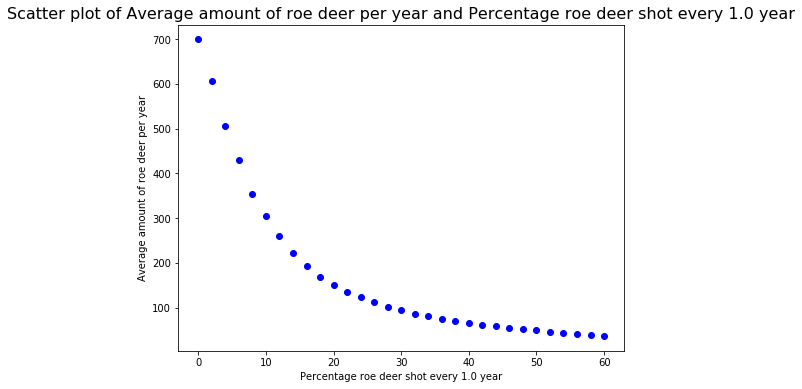

Significant correlation? True


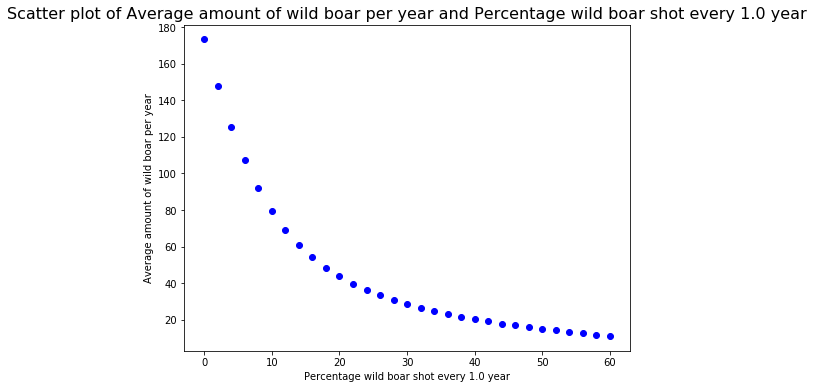

Significant correlation? True


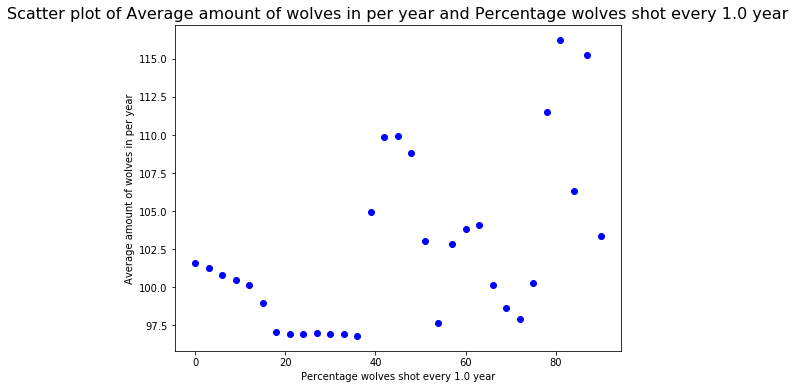

Significant correlation? False


In [17]:
# Make time array so integral can be calculated
t = range(int(36526))
t = [step1*x for x in t]

# Make the params for the lotka-volterra funciton.
params_per = [init_pred, init_prey1, init_prey12, step1, 365.25, 0.9, 'none', 'none', 'none', False, False]

# Make data points for the different species.
params_per[6] = 'percentage'
per_r, res_r = avg_animals_integrate(1, 0, 60, 30, params_per, t) # Roe deer
params_per[6] = 'none'
params_per[7] = 'percentage'
per_b, res_b = avg_animals_integrate(2, 0, 60, 30, params_per, t) # Wild boar
params_per[7] = 'none'
params_per[8] = 'percentage'
per_w, res_w = avg_animals_integrate(0, 0, 90, 30, params_per, t) # Wolves

# Make scatter plots for the different species.
make_scatter_plot(per_r, res_r, 'Percentage roe deer shot every %s year' % str(params_per[4]/365.25), 
                  'Average amount of roe deer per year')
print('Significant correlation? %s' % test_significance(res_r[1:], res_r[0]))

make_scatter_plot(per_b, res_b, 'Percentage wild boar shot every %s year' % str(params_per[4]/365.25), 
                  'Average amount of wild boar per year')
print('Significant correlation? %s' % test_significance(res_b[1:], res_b[0]))

make_scatter_plot(per_w, res_w, 'Percentage wolves shot every %s year' % str(params_per[4]/365.25), 
                  'Average amount of wolves in per year')
print('Significant correlation? %s' % test_significance(res_w[1:], res_w[0]))

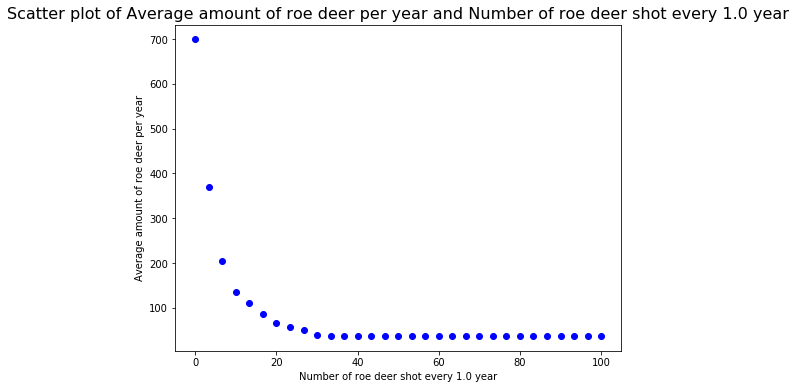

Significant correlation? True


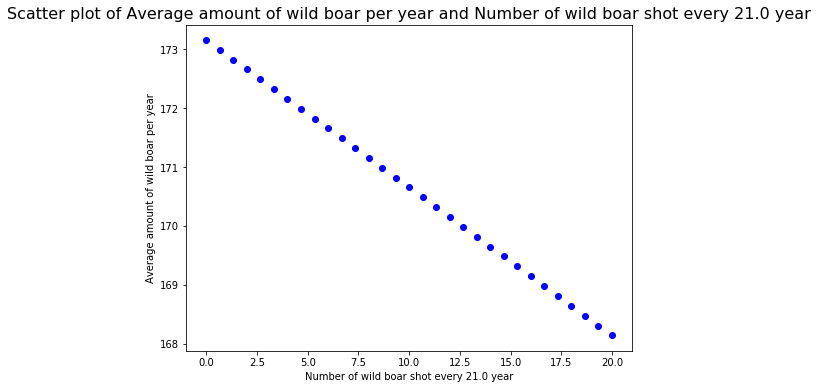

Significant correlation? True


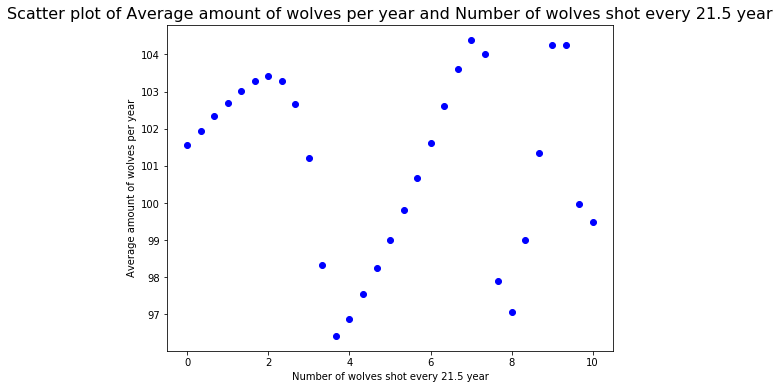

Significant correlation? False


In [18]:
params_num = [init_pred, init_prey1, init_prey12, step1, 365.25, 0, 'static', 'none', 'none', False, False]

# Make data points for the different species.
period_deer = params_num[4]
num_r, num_res_r = avg_animals_integrate(1, 0, 100, 30, params_num, t, type='num') # Roe deer
params_num[6] = 'none'
params_num[7] = 'static'
params_num[4] = 21*365.25
period_boar = params_num[4]
num_b, num_res_b = avg_animals_integrate(2, 0, 20, 30, params_num, t, type='num') # Wild boar
params_num[7] = 'none'
params_num[8] = 'static'
params_num[4] = 21.5*365.25
num_w, num_res_w = avg_animals_integrate(0, 0, 10, 30, params_num, t, type='num') # Wolves

# Make scatter plots for the different species.
make_scatter_plot(num_r, num_res_r, 'Number of roe deer shot every %s year' % str(period_deer/365.25), 
                  'Average amount of roe deer per year')
print('Significant correlation? %s' % test_significance(num_res_r[1:], num_res_r[0]))

make_scatter_plot(num_b, num_res_b, 'Number of wild boar shot every %s year' % str(period_boar/365.25), 
                  'Average amount of wild boar per year')
print('Significant correlation? %s' % test_significance(num_res_b[1:], num_res_b[0]))

make_scatter_plot(num_w, num_res_w, 'Number of wolves shot every %s year' % str(params_num[4]/365.25), 
                  'Average amount of wolves per year')
print('Significant correlation? %s' % test_significance(num_res_w[1:], num_res_w[0]))

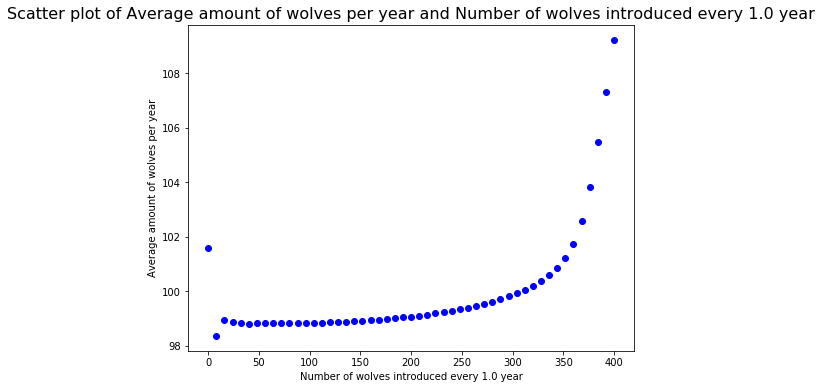

Significant correlation? True


In [19]:
# Average amount of animals and percentage of wolves introduced
params_wolf = [init_pred, init_prey1, init_prey12, step1, 365.25, 0, 'none', 'none', 'none', True, False]

# Make data points for the different species.
wolf_num, wolf_res = avg_animals_integrate(0, 0, 40, 50, params_wolf, t, type='num')
wolf_num *= 10

# Make scatter plots for the different species.
make_scatter_plot(wolf_num, wolf_res, 'Number of wolves introduced every %s year' % str(params_wolf[4]/365.25), 
                  'Average amount of wolves per year')
print('Significant correlation? %s' % test_significance(wolf_res[1:], wolf_res[0]))

In [20]:
def avg_animals_winters(p_min, p_max, steps, params, t_array, type='per'):
    results = []
    periods = np.linspace(p_min, p_max, steps+1)
    
    # Calculate total avg amount of prey if every p year is severe winter.
    for p in periods:
        params[4] = p
        avg_roe = average_amount_array(lotka_volterra(params)[1], t_array)
        avg_boar = average_amount_array(lotka_volterra(params)[2], t_array)
        results.append(avg_roe + avg_boar)
    
    return periods, results

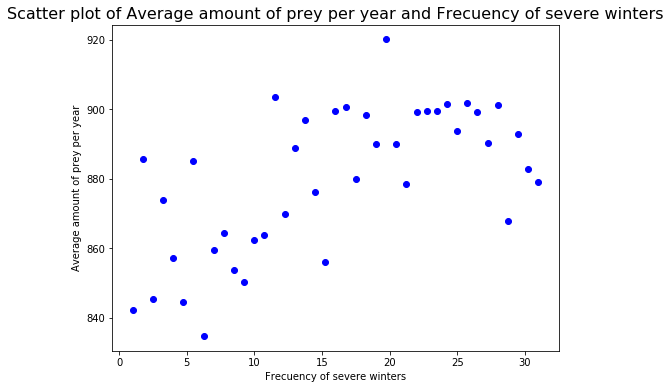

Significant correlation? True


In [21]:
# Average amount of animals and frequency of severe winters. In severe winter growth is decreased with 9/10.
params_winter = [init_pred, init_prey1, init_prey12, step1, 365.25, 0.9, 'none', 'none', 'none', False, True]

# Make data points for severe winter
per_win, tot_prey = avg_animals_winters(365.25, 31*365.25, 40, params_winter, t)
per_win /= 365.25

# Calculate mean, no events happening.
params_mean = [init_pred, init_prey1, init_prey12, step1, 365.25, 0.75, 'none', 'none', 'none', False, False]
tot_mean = (average_amount_array(lotka_volterra(params_mean)[1], t) + 
            average_amount_array(lotka_volterra(params_mean)[2], t))

make_scatter_plot(per_win, tot_prey, 'Frecuency of severe winters', 
                  'Average amount of prey per year')
print('Significant correlation? %s' % test_significance(tot_prey, tot_mean))